# Tugas Pendahuluan
Tugas Pendahuluan dikerjakan dengan dataset titanic yang dapat didownload pada link [berikut](https://drive.google.com/file/d/16j_9FEHLjh_Y_3CdUtp9M13VwImyT89T/view?usp=sharing). Lakukan prediksi apakah suatu penumpang selamat atau tidak (kolom **survived**), bernilai 0 jika tidak selamat, dan 1 jika selamat.

<br>
Tugas dikerjakan secara berkelompok, dengan 1 kelompok terdiri atas 2 mahasiswa. Waktu pengerjaan dari 28 Maret 2022 - 3 April 2022 pukul 23.59.

# 0. Loading Data and Library

In [107]:
# Put your library here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [108]:
# Read data here
data = pd.read_csv("titanic_dataset.csv")
df = pd.DataFrame(data)
df.head()

,index,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3.0,1.0,"Abelseth, Miss. Karen Marie",female,16.0,0.0,0.0,348125,7.6500,NaN,S
1,1,3.0,0.0,"Burns, Miss. Mary Delia",female,18.0,0.0,0.0,330963,7.8792,NaN,Q
2,2,1.0,1.0,"Fortune, Miss. Alice Elizabeth",female,24.0,3.0,2.0,19950,263.0000,C23 C25 C27,S
3,3,3.0,1.0,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1.0,0.0,345572,17.4000,NaN,S
4,4,3.0,0.0,"Jonsson, Mr. Nils Hilding",male,27.0,0.0,0.0,350408,7.8542,NaN,S


# I. Data Understanding
Tujuan dari bagian ini adalah peserta dapat memahami kualitas dari data yang diberikan. Hal ini meliputi:
1. Ukuran data
2. Statistik dari tiap fitur
3. Pencilan (outlier)
4. Korelasi
5. Distribusi 

## I.1 
Carilah:
1. Ukuran dari data (instances dan features)
2. Tipe dari tiap-tiap fitur 
3. Banyaknya unique values dari fitur yang bertipe kategorikal
4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur yang tidak bertipe kategorikal

In [109]:
# I.1 Put your code here
# 1. Ukuran dari data (instances dan features)
data_size = df.shape[0]
feature_size = df.loc[:, df.columns!='survived'].shape[1]

# 2. Tipe dari tiap-tiap fitur
type_desc = """
- pclass : Ordinal, Discrete
- sex : Binary, Discrete
- embarked : Categorical, Discrete
- age : Numeric, Discrete
- fare : Numeric, Continuous
- sibsp : Numeric, Discrete
- parch : Numeric, Discrete
- ticket : Nominal, Discrete
- cabin : Nominal, Discrete
- name : Nominal, Discrete
- index : Categorical, Discrete
"""

# 3. Banyaknya unique values dari fitur yang bertipe kategorikal
categorical = ['pclass', 'sex', 'embarked']
df_categorical = df[categorical]
unique_values = df_categorical.nunique().to_frame().reset_index()
unique_values.columns = ['Feature', 'Unique Value Count']

# 4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur yang tidak bertipe kategorikal
non_categorical = ['age', 'sibsp', 'parch', 'fare']
df_non_categorical = df[non_categorical]
data_min = df_non_categorical.min()
data_max = df_non_categorical.max()
data_mean = df_non_categorical.mean()
data_median = df_non_categorical.median()
data_std = df_non_categorical.std()
data_desc = f"""
Minimum:
{data_min}

Maksimum:
{data_max}

Rata-rata:
{data_mean}

Median:
{data_median}

Standar Deviasi:
{data_std}
"""

print(f"1. Ukuran data: {data_size} | Jumlah fitur: {feature_size}\n")
print(f"2. Tipe dari tiap fitur:\n{type_desc}\n")
print(f"3. Banyaknya unique values dari fitur yang bertipe kategorikal:\n{unique_values}\n")
print(f"4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur yang tidak bertipe kategorikal:\n{data_desc}\n")

1. Ukuran data: 1309 | Jumlah fitur: 11

2. Tipe dari tiap fitur:

- pclass : Ordinal, Discrete
- sex : Binary, Discrete
- embarked : Categorical, Discrete
- age : Numeric, Discrete
- fare : Numeric, Continuous
- sibsp : Numeric, Discrete
- parch : Numeric, Discrete
- ticket : Nominal, Discrete
- cabin : Nominal, Discrete
- name : Nominal, Discrete
- index : Categorical, Discrete


3. Banyaknya unique values dari fitur yang bertipe kategorikal:
    Feature  Unique Value Count
0    pclass                   3
1       sex                   2
2  embarked                   3

4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur yang tidak bertipe kategorikal:

Minimum:
age      0.1667
sibsp    0.0000
parch    0.0000
fare     0.0000
dtype: float64

Maksimum:
age       80.0000
sibsp      8.0000
parch      9.0000
fare     512.3292
dtype: float64

Rata-rata:
age      29.881135
sibsp     0.498854
parch     0.385027
fare     33.295479
dtype: float64

Median:
age      28.0

## I.2
Carilah:
1. Missing values dari tiap fitur
2. Outliers dari tiap fitur (gunakan metode yang kalian ketahui)

Missing values dari tiap fitur:
index          0
pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

Jumlah outliers dari tiap fitur:
age        10
sibsp      57
parch    1309
fare      171
dtype: int64

Outliers dari tiap fitur:
AxesSubplot(0.125,0.125;0.775x0.755)


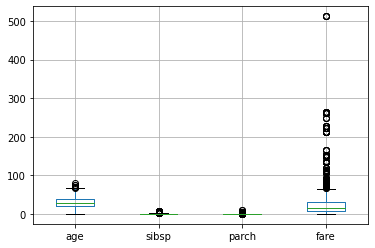

In [110]:
# I.2 Put your code here
# 1. Missing values dari tiap fitur
missing_values = df.isna().sum()
# 2. Outliers dari tiap fitur
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

outliers = df_non_categorical[(df_non_categorical <= lower_bound[non_categorical]) | (df_non_categorical >= upper_bound[non_categorical])]
boxplot = df.boxplot(column=non_categorical)

print(f"Missing values dari tiap fitur:\n{missing_values}\n")
print(f"Jumlah outliers dari tiap fitur:\n{outliers.count()}\n")
print(f"Outliers dari tiap fitur:\n{boxplot}")

## I.3
Carilah:
1. Korelasi antar fitur
2. Visualisasikan distribusi dari tiap fitur (kategorikal dan kontinu)
3. Visualisasikan distribusi dari tiap fitur, dengan data dibagi tiap unique values fitur survived

In [111]:
# I.3 Put your code here
# 1. Korelasi antar fitur
print(f'1. Korelasi antar fitur\n{df.corr()}')

1. Korelasi antar fitur
             index    pclass  survived       age     sibsp     parch      fare
index     1.000000 -0.003466  0.002967 -0.003376 -0.015501 -0.013538 -0.022424
pclass   -0.003466  1.000000 -0.312469 -0.408106  0.060832  0.018322 -0.558629
survived  0.002967 -0.312469  1.000000 -0.055513 -0.027825  0.082660  0.244265
age      -0.003376 -0.408106 -0.055513  1.000000 -0.243699 -0.150917  0.178739
sibsp    -0.015501  0.060832 -0.027825 -0.243699  1.000000  0.373587  0.160238
parch    -0.013538  0.018322  0.082660 -0.150917  0.373587  1.000000  0.221539
fare     -0.022424 -0.558629  0.244265  0.178739  0.160238  0.221539  1.000000


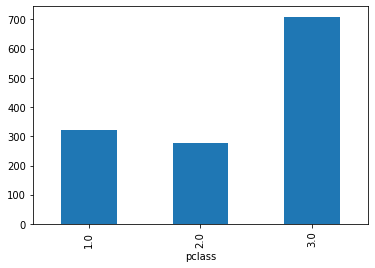

In [112]:
# 2. Visualisasikan distribusi dari tiap fitur (kategorikal dan kontinu)

df.groupby('pclass')['index'].count().plot.bar()
plt.show()

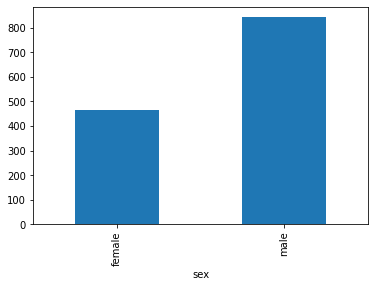

In [113]:
df.groupby('sex')['index'].count().plot.bar()
plt.show()

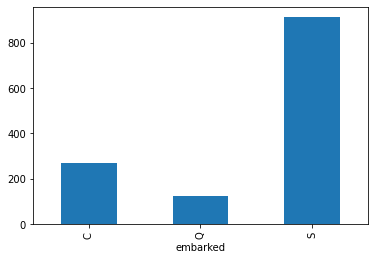

In [114]:
df.groupby('embarked')['index'].count().plot.bar()
plt.show()

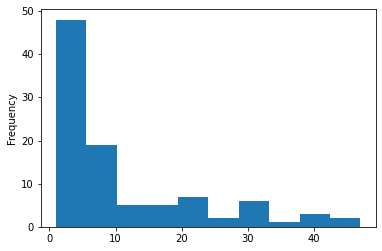

In [115]:
df.groupby('age')['index'].count().plot.hist()
plt.show()

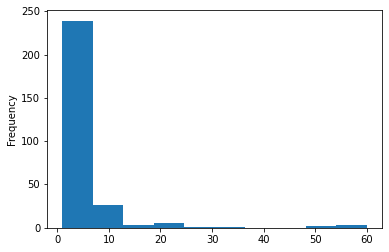

In [116]:
df.groupby('fare')['index'].count().plot.hist()
plt.show()

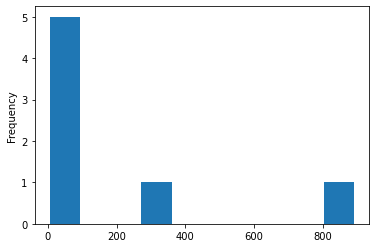

In [117]:
df.groupby('sibsp')['index'].count().plot.hist()
plt.show()

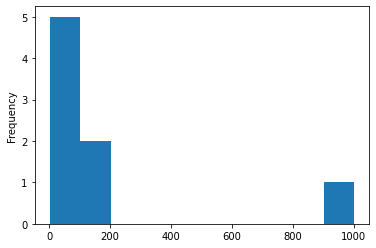

In [118]:
df.groupby('parch')['index'].count().plot.hist()
plt.show()

<AxesSubplot:xlabel='pclass'>

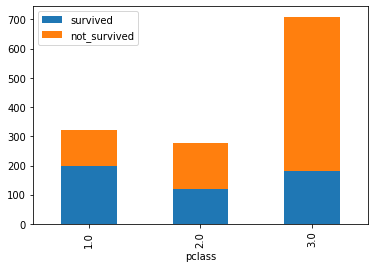

In [119]:
# 3. Visualisasikan distribusi dari tiap fitur, dengan data dibagi tiap unique values fitur survived

total = df.groupby('pclass')['index'].count()

survived = df[df['survived']==1].groupby('pclass')['index'].count()
not_survived = df[df['survived']==0].groupby('pclass')['index'].count()

dt = pd.concat([total, survived, not_survived], axis=1, sort=True)
dt.fillna(0, inplace=True)
dt.columns=['total','survived','not_survived']
dt = dt.astype('int64')

dt.loc[:,['survived','not_survived']].plot.bar(stacked=True)

<AxesSubplot:xlabel='sex'>

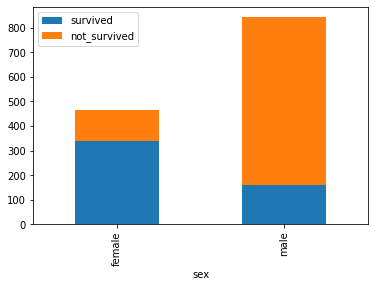

In [120]:
total = df.groupby('sex')['index'].count()

survived = df[df['survived']==1].groupby('sex')['index'].count()
not_survived = df[df['survived']==0].groupby('sex')['index'].count()

dt = pd.concat([total, survived, not_survived], axis=1, sort=True)
dt.fillna(0, inplace=True)
dt.columns=['total','survived','not_survived']
dt = dt.astype('int64')

dt.loc[:,['survived','not_survived']].plot.bar(stacked=True)

<AxesSubplot:xlabel='embarked'>

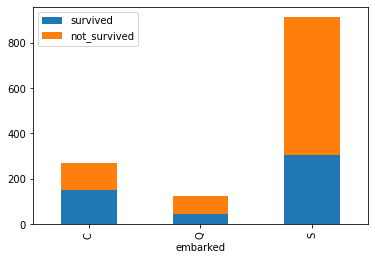

In [121]:
total = df.groupby('embarked')['index'].count()

survived = df[df['survived']==1].groupby('embarked')['index'].count()
not_survived = df[df['survived']==0].groupby('embarked')['index'].count()

dt = pd.concat([total, survived, not_survived], axis=1, sort=True)
dt.fillna(0, inplace=True)
dt.columns=['total','survived','not_survived']
dt = dt.astype('int64')

dt.loc[:,['survived','not_survived']].plot.bar(stacked=True)

<AxesSubplot:xlabel='age'>

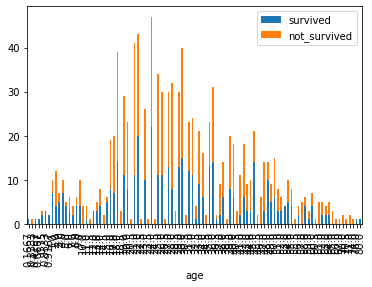

In [122]:
total = df.groupby('age')['index'].count()

survived = df[df['survived']==1].groupby('age')['index'].count()
not_survived = df[df['survived']==0].groupby('age')['index'].count()

dt = pd.concat([total, survived, not_survived], axis=1, sort=True)
dt.fillna(0, inplace=True)
dt.columns=['total','survived','not_survived']
dt = dt.astype('int64')

dt.loc[:,['survived','not_survived']].plot.bar(stacked=True)

<AxesSubplot:xlabel='fare'>

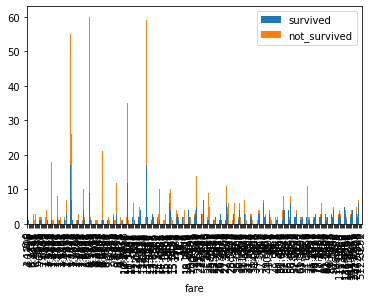

In [123]:
total = df.groupby('fare')['index'].count()

survived = df[df['survived']==1].groupby('fare')['index'].count()
not_survived = df[df['survived']==0].groupby('fare')['index'].count()

dt = pd.concat([total, survived, not_survived], axis=1, sort=True)
dt.fillna(0, inplace=True)
dt.columns=['total','survived','not_survived']
dt = dt.astype('int64')

dt.loc[:,['survived','not_survived']].plot.bar(stacked=True)

<AxesSubplot:xlabel='sibsp'>

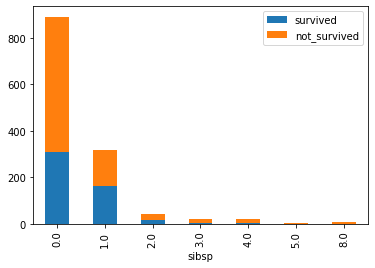

In [124]:
total = df.groupby('sibsp')['index'].count()

survived = df[df['survived']==1].groupby('sibsp')['index'].count()
not_survived = df[df['survived']==0].groupby('sibsp')['index'].count()

dt = pd.concat([total, survived, not_survived], axis=1, sort=True)
dt.fillna(0, inplace=True)
dt.columns=['total','survived','not_survived']
dt = dt.astype('int64')

dt.loc[:, ['survived','not_survived']].plot.bar(stacked=True)

<AxesSubplot:xlabel='parch'>

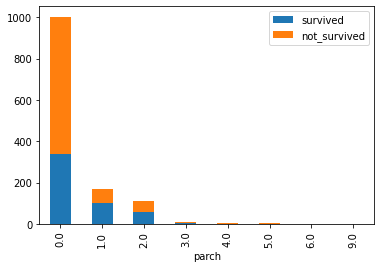

In [125]:
total = df.groupby('parch')['index'].count()

survived = df[df['survived']==1].groupby('parch')['index'].count()
not_survived = df[df['survived']==0].groupby('parch')['index'].count()

dt = pd.concat([total, survived, not_survived], axis=1, sort=True)
dt.fillna(0, inplace=True)
dt.columns=['total','survived','not_survived']
dt = dt.astype('int64')

dt.loc[:,['survived','not_survived']].plot.bar(stacked=True)

## I.4
Lakukanlah analisa pada data lebih lanjut jika dibutuhkan, kemudian lakukanlah:
1. Penambahan fitur jika memungkinkan
2. Pembuangan fitur yang menurut kalian tidak dibutuhkan
3. Penanganan missing values
4. Transformasi data kategorikal menjadi numerikal (encoding), dengan metode yang kalian inginkan
5. Lakukan scaling dengan MinMaxScaler

In [126]:
# I.4

# 1. Penambahan fitur jika memungkinkan
# Tidak memerlukan penambahan fitur sehingga tidak dilakukan, karena fitur yang ada sudah cukup untuk memprediksi apakah penumpang survived atau tidak.

# 2. Pembuangan fitur yang tidak dibutuhkan
df.drop(['name','ticket','embarked', 'cabin'], axis=1, inplace=True)

# 3. Penanganan missing values
# mengisi nilai null dengan rata-rata dari feature
df['age'].fillna(df['age'].mean(), inplace=True)
df['fare'].fillna(df['fare'].mean(), inplace=True)


# 4. Encoding data kategorikal
encoder = LabelEncoder()
df['pclass'] = encoder.fit_transform(data['pclass'])
df['sex'] = encoder.fit_transform(data['sex'])

# 5. Scaling
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)


# II. Experiments Design
Tujuan dari bagian ini adalah peserta dapat memahami cara melakukan eksperimen mencari metode terbaik dengan benar. Hal ini meliputi:
1. Pembuatan model
2. Proses validasi
3. Hyperparameter tuning

## II.1
Tentukanlah metrics yang akan digunakan pada eksperimen kali ini (dapat lebih dari 1 metric)

1. Accuracy
2. Recall
3. F1 Score
4. Precisision

## II.2 
Bagi data dengan perbandingan 0.8 untuk data train dan 0.2 untuk data validasi

In [127]:
# II.2
x = df[['index', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'sex']]
y = df['survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=42)

## II.3
Lakukanlah:
1. Prediksi dengan menggunakan model Logistic Regression sebagai *baseline*
2. Tampilkan evaluasi dari model yang dibangun dari metrics yang anda tentukan pada II.1
3. Tampilkan confusion matrix

In [128]:
# II.3

# 1. Prediksi dengan Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
titanic_pred = lr.predict(x_test)

# 2. Evaluasi
print("Evaluasi pembelajaran Logistic Regression dengan metrics II.1: \n")
print(classification_report(y_test, titanic_pred))
print("precision hasil prediksi :", precision_score(y_test, titanic_pred))
print("recall hasil prediksi :", recall_score(y_test, titanic_pred))
print("f1 score hasil prediksi :", f1_score(y_test, titanic_pred))
print("Accuracy hasil prediksi :",accuracy_score(y_test, titanic_pred))

# 3. Confusion matrix
print("\nConfusion matrix: \n")
print(pd.DataFrame(confusion_matrix(y_test, titanic_pred),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes']))

Evaluasi pembelajaran Logistic Regression dengan metrics II.1: 

              precision    recall  f1-score   support

         0.0       0.75      0.87      0.81       156
         1.0       0.75      0.58      0.66       106

    accuracy                           0.75       262
   macro avg       0.75      0.73      0.73       262
weighted avg       0.75      0.75      0.75       262

precision hasil prediksi : 0.7469879518072289
recall hasil prediksi : 0.5849056603773585
f1 score hasil prediksi : 0.656084656084656
Accuracy hasil prediksi : 0.7519083969465649

Confusion matrix: 

            Predicted No  Predicted Yes
Actual No            135             21
Actual Yes            44             62


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## II.4 
Lakukanlah:
1. Pembelajaran dengan model lain
2. Hyperparameter tuning model yang kalian pakai dengan menggunakan Grid Search (perhatikan random factor pada beberapa algoritma model)
3. Lakukan validasi dengan menggunakan cross validation


In [129]:
# II.4

# 1. Pembelajaran dengan model SVM
svc = SVC()
svc.fit(x_train, y_train)
titanic_SVM_pred = svc.predict(x_test)
print("Evaluasi pembelajaran SVM dengan metrics II.1: \n")
print(classification_report(y_test, titanic_SVM_pred))
print("precision hasil prediksi SVM :", precision_score(y_test, titanic_SVM_pred))
print("recall hasil prediksi SVM :", recall_score(y_test, titanic_SVM_pred))
print("f1 score hasil prediksi SVM :", f1_score(y_test, titanic_SVM_pred))
print("Accuracy hasil prediksi SVM :",accuracy_score(y_test, titanic_SVM_pred))
print("\nConfusion matrix: \n")
print(pd.DataFrame(confusion_matrix(y_test, titanic_SVM_pred),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes']))

# 2. Hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svm_after_tuning = GridSearchCV(svc, param_grid, refit = True, verbose = 3)
svm_after_tuning.fit(x_train, y_train)
titanic_SVM_after_tuning_pred = svm_after_tuning.predict(x_test) 
print("Evaluasi pembelajaran SVM after tuning dengan metrics II.1:\n")
print(classification_report(y_test, titanic_SVM_after_tuning_pred))
print("precision hasil prediksi SVM setelah tuning :", precision_score(y_test, titanic_SVM_after_tuning_pred))
print("recall hasil prediksi SVM setelah tuning :", recall_score(y_test, titanic_SVM_after_tuning_pred))
print("f1 score hasil prediksi SVM setelah tuning :", f1_score(y_test, titanic_SVM_after_tuning_pred))
print("Accuracy hasil prediksi SVM setelah tuning :",accuracy_score(y_test, titanic_SVM_after_tuning_pred))

# 3. Cross validation
crossval_score = cross_val_score(svc, x_train, y_train.values.ravel(), cv=5)
print(f"\nCross validation score: {crossval_score}")

Evaluasi pembelajaran SVM dengan metrics II.1: 

              precision    recall  f1-score   support

         0.0       0.61      0.99      0.75       156
         1.0       0.75      0.06      0.11       106

    accuracy                           0.61       262
   macro avg       0.68      0.52      0.43       262
weighted avg       0.66      0.61      0.49       262

precision hasil prediksi SVM : 0.75
recall hasil prediksi SVM : 0.05660377358490566
f1 score hasil prediksi SVM : 0.10526315789473685
Accuracy hasil prediksi SVM : 0.6106870229007634

Confusion matrix: 

            Predicted No  Predicted Yes
Actual No            154              2
Actual Yes           100              6
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.627 total time=   

# III. Improvement
Terdapat beberapa metode untuk melakukan peningkatan performa, contohnya adalah:
1. Melakukan oversampling / undersampling pada data
2. Menggabungkan beberapa model 

Pada bagian ini, kalian diharapkan dapat:
1. Melakukan training dengan data hasil oversampling / undersampling dan melakukan validasi dengan benar
2. Memahami beberapa metode untuk menggabungkan beberapa model

## III.1
Lakukanlah:
1. Oversampling pada kelas minoritas pada data train, kemudian train dengan model *baseline* (II.3), lakukan validasi dengan data validasi. Data train dan validasi adalah data yang kalian bagi pada bagian II.2
2. Undersampling pada kelas mayoritas pada data train, kemudian train dengan model *baseline* (II.3) lakukan validasi dengan data validasi. Data train dan validasi adalah data yang kalian bagi pada bagian II.2

In [130]:
# III.1 
over_sampler = RandomOverSampler(sampling_strategy="not majority", random_state=42)
os_x_train, os_y_train = over_sampler.fit_resample(x_train, y_train)

lr.fit(os_x_train, os_y_train)
titanic_oversample_pred = lr.predict(x_test)
print("Evaluasi pembelajaran baseline model oversampling dengan metrics II.1:\n")
print(classification_report(y_test, titanic_oversample_pred))
print("precision hasil prediksi:", precision_score(y_test, titanic_oversample_pred))
print("recall hasil prediksi:", recall_score(y_test, titanic_oversample_pred))
print("f1 score hasil prediksi:", f1_score(y_test, titanic_oversample_pred))
print("Accuracy hasil prediksi:",accuracy_score(y_test, titanic_oversample_pred))

crossval_score = cross_val_score(lr, x_train, y_train.values.ravel(), cv=5)
print(f"\nCross validation score: {crossval_score}")

Evaluasi pembelajaran baseline model oversampling dengan metrics II.1:

              precision    recall  f1-score   support

         0.0       0.77      0.86      0.81       156
         1.0       0.75      0.62      0.68       106

    accuracy                           0.76       262
   macro avg       0.76      0.74      0.75       262
weighted avg       0.76      0.76      0.76       262

precision hasil prediksi: 0.75
recall hasil prediksi: 0.6226415094339622
f1 score hasil prediksi: 0.6804123711340205
Accuracy hasil prediksi: 0.7633587786259542

Cross validation score: [0.74761905 0.76666667 0.85645933 0.79425837 0.80382775]


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

In [131]:
under_sampler = RandomUnderSampler(sampling_strategy=1, random_state=42)
us_x_train, us_y_train = under_sampler.fit_resample(x_train, y_train)

lr.fit(os_x_train, os_y_train)
titanic_undersample_pred = lr.predict(x_test)
print("Evaluasi pembelajaran baseline model undersampling dengan metrics II.1:\n")
print(classification_report(y_test, titanic_undersample_pred))
print("precision hasil prediksi:", precision_score(y_test, titanic_undersample_pred))
print("recall hasil prediksi:", recall_score(y_test, titanic_undersample_pred))
print("f1 score hasil prediksi:", f1_score(y_test, titanic_undersample_pred))
print("Accuracy hasil prediksi:",accuracy_score(y_test, titanic_undersample_pred))

crossval_score = cross_val_score(lr, x_train, y_train.values.ravel(), cv=5)
print(f"\nCross validation score: {crossval_score}")

Evaluasi pembelajaran baseline model undersampling dengan metrics II.1:

              precision    recall  f1-score   support

         0.0       0.77      0.86      0.81       156
         1.0       0.75      0.62      0.68       106

    accuracy                           0.76       262
   macro avg       0.76      0.74      0.75       262
weighted avg       0.76      0.76      0.76       262

precision hasil prediksi: 0.75
recall hasil prediksi: 0.6226415094339622
f1 score hasil prediksi: 0.6804123711340205
Accuracy hasil prediksi: 0.7633587786259542


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable


Cross validation score: [0.74761905 0.76666667 0.85645933 0.79425837 0.80382775]


## III.2
Lakukanlah:
1. Eksplorasi soft voting, hard voting, dan stacking
2. Buatlah model Logistic Regression dan SVM (boleh menggunakan model dengan beberapa parameter yang berbeda)
3. Lakukanlah soft voting dari model-model yang sudah kalian buat pada poin 2
4. Lakukan hard voting dari model-model yang sudah kalian buat pada poin 2
5. Lakukanlah stacking dengan final classifier adalah Logistic Regression dari model-model yang sudah kalian buat pada poin 2
6. Lakukan validasi dengan metrics yang kalian tentukan untuk poin 3, 4, dan 5

Put your answer for section III.2 point 1 here

In [132]:
# III.2
# 1.
lr = LogisticRegression(random_state=42)
svm1 = SVC(C=1, probability=True, random_state=42)
svm2 = SVC(C=0.3, probability=True, random_state=42)

soft_vote_clf = VotingClassifier(estimators=[('lr', lr), ('svm1', svm1), ('svm2', svm2)], voting='soft')
soft_vote_clf.fit(x_train, y_train)
titanic_softvote_prediction = soft_vote_clf.predict(x_test)

print("Evaluasi pembelajaran dengan soft voting dengan metrics II.1:\n")
print(classification_report(y_test, titanic_softvote_prediction))
print("precision hasil prediksi:", precision_score(y_test, titanic_softvote_prediction))
print("recall hasil prediksi:", recall_score(y_test, titanic_softvote_prediction))
print("f1 score hasil prediksi:", f1_score(y_test, titanic_softvote_prediction))
print("Accuracy hasil prediksi:",accuracy_score(y_test, titanic_softvote_prediction))

crossval_score = cross_val_score(soft_vote_clf, x_train, y_train.values.ravel(), cv=5)
print(f"\nCross validation score: {crossval_score}")

# 2. 
hard_vote_clf = VotingClassifier(estimators=[('lr', lr), ('svm1', svm1), ('svm2', svm2)], voting='hard')
hard_vote_clf.fit(x_train, y_train)
titanic_hardvote_prediction = soft_vote_clf.predict(x_test)

print("Evaluasi pembelajaran dengan hard voting dengan metrics II.1:\n")
print(classification_report(y_test, titanic_hardvote_prediction))
print("precision hasil prediksi:", precision_score(y_test, titanic_hardvote_prediction))
print("recall hasil prediksi:", recall_score(y_test, titanic_hardvote_prediction))
print("f1 score hasil prediksi:", f1_score(y_test, titanic_hardvote_prediction))
print("Accuracy hasil prediksi:",accuracy_score(y_test, titanic_hardvote_prediction))

crossval_score = cross_val_score(hard_vote_clf, x_train, y_train.values.ravel(), cv=5)
print(f"\nCross validation score: {crossval_score}")

# 3.
stacking_clf = StackingClassifier(estimators=[('lr', lr), ('svm1', svm1), ('svm2', svm2)], final_estimator=LogisticRegression())
stacking_clf.fit(x_train, y_train)
titanic_stacking_prediction = stacking_clf.predict(x_train)

print("Evaluasi pembelajaran dengan stacking dengan metrics II.1:\n")
print(classification_report(y_test, titanic_stacking_prediction))
print("precision hasil prediksi:", precision_score(y_test, titanic_stacking_prediction))
print("recall hasil prediksi:", recall_score(y_test, titanic_stacking_prediction))
print("f1 score hasil prediksi:", f1_score(y_test, titanic_stacking_prediction))
print("Accuracy hasil prediksi:",accuracy_score(y_test, titanic_stacking_prediction))

crossval_score = cross_val_score(stacking_clf, x_train, y_train.values.ravel(), cv=5)
print(f"\nCross validation score: {crossval_score}")


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluasi pembelajaran dengan soft voting dengan metrics II.1:

              precision    recall  f1-score   support

         0.0       0.67      0.98      0.79       156
         1.0       0.91      0.28      0.43       106

    accuracy                           0.70       262
   macro avg       0.79      0.63      0.61       262
weighted avg       0.77      0.70      0.65       262

precision hasil prediksi: 0.9090909090909091
recall hasil prediksi: 0.2830188679245283
f1 score hasil prediksi: 0.4316546762589928
Accuracy hasil prediksi: 0.6984732824427481


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable


Cross validation score: [0.7        0.71428571 0.75598086 0.74162679 0.72248804]


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluasi pembelajaran dengan hard voting dengan metrics II.1:

              precision    recall  f1-score   support

         0.0       0.67      0.98      0.79       156
         1.0       0.91      0.28      0.43       106

    accuracy                           0.70       262
   macro avg       0.79      0.63      0.61       262
weighted avg       0.77      0.70      0.65       262

precision hasil prediksi: 0.9090909090909091
recall hasil prediksi: 0.2830188679245283
f1 score hasil prediksi: 0.4316546762589928
Accuracy hasil prediksi: 0.6984732824427481


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable


Cross validation score: [0.64285714 0.65238095 0.64593301 0.64114833 0.63157895]


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Evaluasi pembelajaran dengan stacking dengan metrics II.1:



ValueError: Found input variables with inconsistent numbers of samples: [262, 1047]

# IV. Analisis
Bandingkan hasil dari:
1. Model Baseline (II.3)
2. Model lain (II.4)
3. Hasil undersampling
4. Hasil oversampling
5. Hasil soft voting
6. Hasil hard voting
7. Hasil stacking 

## Model baseline vs Model lain

- Model baseline
    - Precision Score : 
    - Recall Score :
    - F1 Score :
    - Accuracy Score :

- Model lain
    - Support Vector Machine
        - Precision Score :
        - Recall Score :
        - F1 Score :
        - Accuracy Score :
    - Support Vector Machine (tuning)
        - Precision Score :
        - Recall Score :
        - F1 Score :
        - Accuracy Score :

Dapat disimpulkan bahwa pembelajaran dataset dengan menggunakan model Support Vector Machine yang sudah di-tune hyperparameternya melakukan pembelajaran yang lebih baik dan menghasilkan prediksi yang lebih baik dibandingkan pembelajaran menggunakkan model Logistic Regression maupun Support Vector Machine biasa.

## Undersampling vs Oversampling
- Undersampling
    - Precision Score : 
    - Recall Score :
    - F1 Score :
    - Accuracy Score :
- Oversampling
    - Precision Score :
    - Recall Score :
    - F1 Score :
    - Accuracy Score :

Dapat disimpulkan bahwa peningkatan performa dengan undersampling merupakan peningkatan performa yang lebih cocok dibandingkan peningkatan performa dengan oversampling. Hal tersebut dikarenakan hasil perhitungan metrics dengan peningkatan performa undersampling menghasilkan nilai yang lebih baik dibandingkan oversampling.

## Soft Voting vs Hard Voting vs Stacking

- Soft Voting
    - Precision Score : 
    - Recall Score :
    - F1 Score :
    - Accuracy Score :

- Hard Voting
    - Precision Score :  0.9090909090909091
    - Recall Score : 0.2830188679245283
    - F1 Score : 0.4316546762589928
    - Accuracy Score : 0.6984732824427481

- Stacking
    - Precision Score : 
    - Recall Score :
    - F1 Score :
    - Accuracy Score :

Untuk setiap metode ensemble learning, accuracy yang diperoleh tidak lebih baik daripada hasil SVM dengan hyperparameter tuning pada sendirinya. Namun, nilai precision dan f1 mengalami peningkatan, sehingga dapat disimpulkan bahwa metode voting atau stacking memperbaiki kemampuan model memprediksi kasus positif (penumpang survive).